Plotly is a library that allows you to create interactive plots that you can use in dashboards or websites (you can save them as html files or static images).

## Installation

In order for this all to work, you'll need to install plotly and cufflinks to call plots directly off of a pandas dataframe. These libraries are not currently available through **conda** but are available through **pip**. Install the libraries at your command line/terminal using:

    !pip install plotly
    !pip install cufflinks

** NOTE: Make sure you only have one installation of Python on your computer when you do this, otherwise the installation may not work. **

## Imports and Set-up

In [1]:
!pip install plotly
!pip install cufflinks
!pip install folium

In [2]:
!pip install mpl_toolkits

ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls


## Using Cufflinks and iplot()
* line
* scatter
* bar
* box
* spread
* ratio
* heatmap
* surface
* histogram
* bubble

In [5]:
print(py.__version__)

5.9.0


In [6]:
# import the library
import folium
import pandas as pd

In [7]:
# Make a data frame with dots to show on the map
data = pd.DataFrame({
   'lat':[-58.0, 2.0, 145.0, 30.32, -4.03, -73.57, 36.82, -38.5],
   'lon':[-34.0, 49.0, -38.0, 59.93, 5.33, 45.52, -1.29, -12.97],
   'name':['Buenos Aires', 'Paris', 'melbourne', 'St Petersbourg', 'Abidjan', 'Montreal', 'Nairobi', 'Salvador'],
   'value':[1.0,1.2,4.0,7.0,2.3,4.3,10.0,43.0]
})
data

,lat,lon,name,value
0,-58.00,-34.00,Buenos Aires,1.0
1,2.00,49.00,Paris,1.2
2,145.00,-38.00,melbourne,4.0
3,30.32,59.93,St Petersbourg,7.0
4,-4.03,5.33,Abidjan,2.3
5,-73.57,45.52,Montreal,4.3
6,36.82,-1.29,Nairobi,10.0
7,-38.50,-12.97,Salvador,43.0


In [16]:
# Make an empty map
m = folium.Map(location=[20,0], attr="Mapbox Bright",tiles="https://api.mapbox.com/v4/mapbox.streets/{z}/{x}/{y}.png?access_token=mytoken", zoom_start=2)


In [17]:
# I can add marker one by one on the map
for i in range(0,len(data)):
   folium.Circle(
      location=[data.iloc[i]['lon'], data.iloc[i]['lat']],
      popup=data.iloc[i]['name'],
      radius=int(data.iloc[i]['value']*10000),
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(m)
 
# Save it as html



In [18]:
folium.__version__

'0.14.0'

In [19]:
m.save('mymap.html')

In [20]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.graph_objects as go

fig = go.Figure(go.Choroplethmapbox(geojson=counties, locations=df.fips, z=df.unemp,
                                    colorscale="Viridis", zmin=0, zmax=12,
                                    marker_opacity=0.5, marker_line_width=0))
fig.update_layout(mapbox_style="carto-positron",
                  mapbox_zoom=3, mapbox_center = {"lat": 37.0902, "lon": -95.7129})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

URLError: <urlopen error [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond>

In [13]:
py.offline.init_notebook_mode(connected=True)

In [14]:
cf.go_offline()

In [15]:
df = pd.DataFrame(np.random.randn(100,3), columns = ['A', 'B', 'C'])
df.head()
df['A'] = df['A'].cumsum() + 20
df['B'] = df['B'].cumsum() + 20
df['C'] = df['C'].cumsum() + 20

In [16]:
import pandas as pd
us_cities = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv")

import plotly.express as px

fig = px.scatter_mapbox(us_cities, lat="lat", lon="lon", hover_name="City", hover_data=["State", "Population"],
                        color_discrete_sequence=["fuchsia"], zoom=3, height=300)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [10]:
df.head()

,A,B,C
0,20.268711,18.542643,21.062314
1,22.566511,18.990649,22.342033
2,23.425514,19.384489,22.155410
3,24.391043,18.633868,22.175383
4,23.936587,19.946516,22.107627


In [11]:
df.iplot()

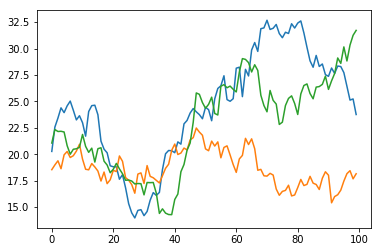

In [12]:
plt.plot(df)

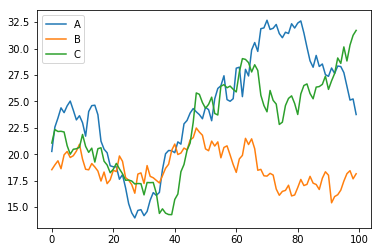

In [13]:
df.plot()

In [14]:
df.iplot(x = 'A', y = 'B', mode = 'markers', size = 25)

In [17]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [18]:
titanic.iplot(kind = 'bar', x = 'sex', y = 'survived', title = 'Survived', xTitle='Sex', yTitle='#Survived')

In [17]:
titanic['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [19]:
cf.getThemes()


['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

In [20]:
cf.set_config_file(theme='polar')
df.iplot(kind = 'bar', barmode='stack', bargap=0.5)

In [21]:
df.iplot(kind = 'bar', barmode='stack', bargap=0.5)

In [22]:
df.iplot(kind = 'barh', barmode='stack', bargap=0.5)

In [23]:
1,2,3,4,5,6,7

(1, 2, 3, 4, 5, 6, 7)

In [24]:
df.iplot(kind = 'box')

In [25]:
df.iplot()

In [26]:
df.iplot(kind = 'area')

In [27]:
df3 = pd.DataFrame({'X': [10,20,30,20,10], 'Y': [10, 20, 30, 20, 10], 'Z': [10, 20, 30, 20, 10]})
df3.head()

,X,Y,Z
0,10,10,10
1,20,20,20
2,30,30,30
3,20,20,20
4,10,10,10


In [29]:
df3.iplot(kind='surface', colorscale='rdylbu')

In [30]:
help(cf.datagen)Export to plot.ly »
x: 1y: Yz: 20


SyntaxError: invalid syntax (<ipython-input-30-3c7d38ecc0a4>, line 1)

In [31]:
cf.datagen.sinwave(10, 0.25).iplot(kind = 'surface')

C:\ProgramData\Anaconda3\lib\site-packages\cufflinks\datagen.py:380: RuntimeWarning:

invalid value encountered in true_divide



In [33]:
cf.datagen.scatter3d(2, 150, mode = 'stocks').iplot(kind = 'scatter3d', x = 'x', y= 'y', z = 'z')

In [34]:
df[['A', 'B']].iplot(kind = 'spread')

C:\ProgramData\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

C:\ProgramData\Anaconda3\lib\site-packages\cufflinks\plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



In [35]:
df.iplot(kind='hist', bins = 25, barmode = 'overlay', bargap=0.5)

In [37]:
cf.datagen.bubble3d(5,4,mode='stocks').iplot(kind='bubble3d',x='x',y='y',z='z', size='size')

In [38]:
cf.datagen.heatmap(20,20).iplot(kind = 'heatmap', colorscale='spectral', title='Cufflinks - Heatmap')